In [ ]:
from google.colab import drive
import os
from fastai.vision.all import *

#drive.mount('/content/drive')

# Define specific path where data is stored
base_path = '/content/drive/MyDrive/Colab Notebooks/language-classifier/language-datasets'

# Counts files in a directory and its subdirectories
def count_files_in_directory(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
      count += len(files)
    return count

# Check if folders exist and print confirmation
if os.path.exists(f'{base_path}/programming') and os.path.exists(f'{base_path}/human'):
  print(f"Directories exist at: {base_path}")

  # Count items in 'programming-languages' directory
  programming_count = count_files_in_directory(f'{base_path}/programming')
  print(f"Number of items in 'programming': {programming_count}")

  # Count items in 'human-languages' directory
  human_count = count_files_in_directory(f'{base_path}/human')
  print(f"Number of items in 'human': {human_count}")

else:
  print("One or more directories do not exist. Please check the paths.")

Directories exist at: /content/drive/MyDrive/Colab Notebooks/language-classifier/language-datasets
Number of items in 'programming': 26
Number of items in 'human': 20


In [ ]:
# Simple code check
human_count + programming_count

46

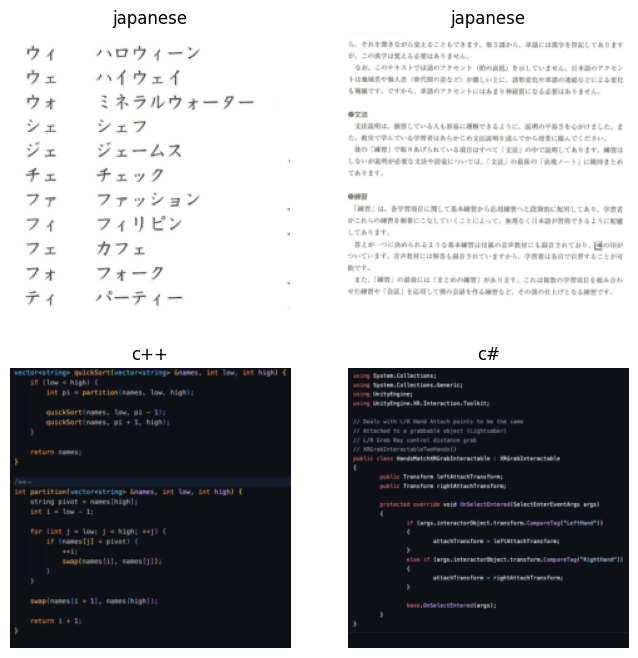

In [ ]:
# Create DataLoader with automatic resiziing to 224x224 pixels
# dls = ImageDataLoaders.from_folder(base_path, valid_pct=0.2, item_tfms=Resize(224), bs=8)

# Augment the photos to improve generalization with the model (flips, rotations, zooms, etc.)
dls = ImageDataLoaders.from_folder(base_path, valid_pct=0.2, item_tfms=Resize(224), batch_tfs=aug_transforms(mult=2.0), bs=4)

dls.show_batch(max_n=8, figsize=(8, 8))

In [ ]:
# Train a model
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 147MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,3.162710,2.048245,0.333333,00:11


epoch,train_loss,valid_loss,accuracy,time
0,2.344226,2.034649,0.333333,00:12
1,1.988111,1.612758,0.333333,00:12
2,1.759575,1.679479,0.222222,00:15
3,1.499737,1.792313,0.222222,00:13


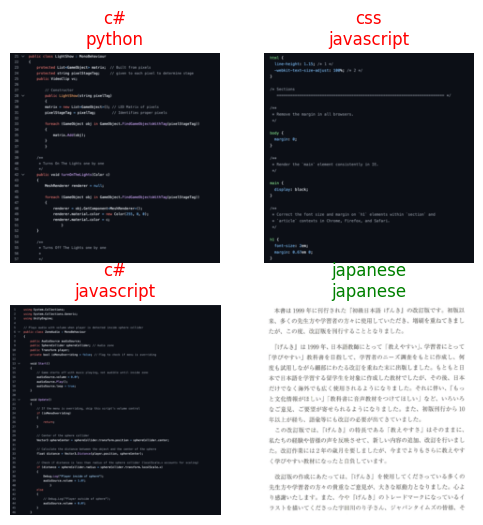

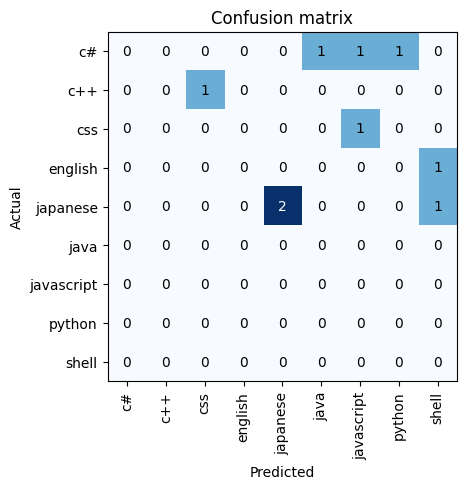

In [ ]:
learn.show_results()
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Saving human-or-PROGRAMMING.jpg to human-or-PROGRAMMING.jpg


Prediction: c#
Probablity: 0.3476


<Axes: >

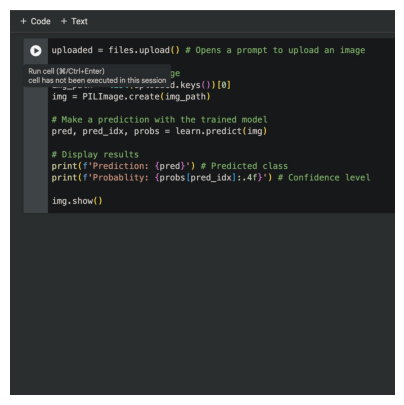

In [ ]:
from google.colab import files

uploaded = files.upload() # Opens a prompt to upload an image

# Load the uploaded image
img_path = list(uploaded.keys())[0]
img = PILImage.create(img_path)

# Make a prediction with the trained model
pred, pred_idx, probs = learn.predict(img)

# Display results
print(f'Prediction: {pred}') # Predicted class
print(f'Probablity: {probs[pred_idx]:.4f}') # Confidence level

img.show()